In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Loading our sample dataset.
df = pd.read_csv('googleplaystore.csv')
print(df)

                                                     App             Category  \
0         Photo Editor & Candy Camera & Grid & ScrapBook       ART_AND_DESIGN   
1                                    Coloring book moana       ART_AND_DESIGN   
2      U Launcher Lite – FREE Live Cool Themes, Hide ...       ART_AND_DESIGN   
3                                  Sketch - Draw & Paint       ART_AND_DESIGN   
4                  Pixel Draw - Number Art Coloring Book       ART_AND_DESIGN   
5                             Paper flowers instructions       ART_AND_DESIGN   
6                Smoke Effect Photo Maker - Smoke Editor       ART_AND_DESIGN   
7                                       Infinite Painter       ART_AND_DESIGN   
8                                   Garden Coloring Book       ART_AND_DESIGN   
9                          Kids Paint Free - Drawing Fun       ART_AND_DESIGN   
10                               Text on Photo - Fonteee       ART_AND_DESIGN   
11               Name Art Ph

In [3]:
df1 = df.sort_values(by=['Installs','Rating'], ascending=False)
print(df1)
df1.shape

                                                     App            Category  \
10472            Life Made WI-Fi Touchscreen Photo Frame                 1.9   
4005             Clean Master- Space Cleaner & Antivirus               TOOLS   
7536   Security Master - Antivirus, VPN, AppLock, Boo...               TOOLS   
371                Google Duo - High Quality Video Calls       COMMUNICATION   
3255                          SHAREit - Transfer & Share               TOOLS   
4039               Google Duo - High Quality Video Calls       COMMUNICATION   
4566                          SHAREit - Transfer & Share               TOOLS   
378          UC Browser - Fast Download Private & Secure       COMMUNICATION   
420          UC Browser - Fast Download Private & Secure       COMMUNICATION   
1722                                      My Talking Tom                GAME   
1908                                      My Talking Tom                GAME   
3450                                    

(10841, 13)

In [4]:
df2 = df1.dropna().copy()
print("We have dropped ",df1.shape[0]- df2.shape[0]," entries with NaN values.")

We have dropped  1481  entries with NaN values.


Find a dataset you'd like to explore. This can be something you're familiar with or something new. Create a Jupyter notebook and then:

Choose one variable and plot that variable four different ways.
Choose two continuous variables, and plot them three different ways.
Choose one continuous variable and one categorical variable, and plot them six different ways.
Give the pros and cons of each plot you create. You can use variables from multiple datasets if you like.

### Find a dataset you'd like to explore. This can be something you're familiar with or something new. Create a Jupyter notebook and then:
- Choose one variable and plot that variable four different ways.
- Choose two continuous variables, and plot them three different ways.
- Choose one continuous variable and one categorical variable, and plot them six different ways.
- Give the pros and cons of each plot you create. You can use variables from multiple datasets if you like.

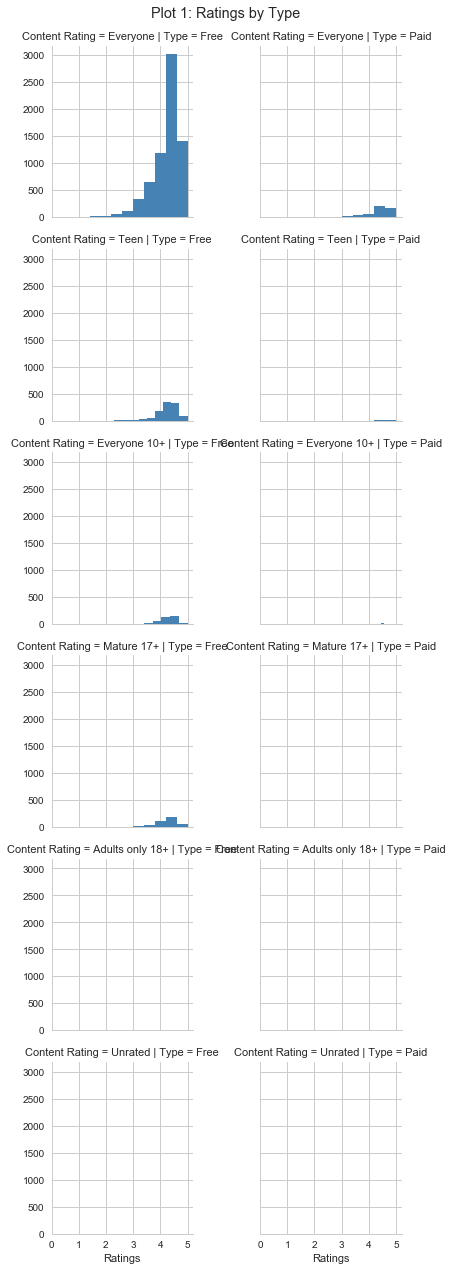

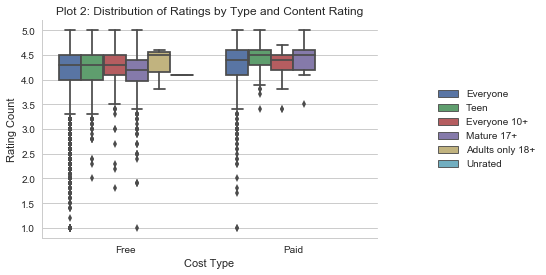

In [5]:
# Creating variables for each of the two conditions to graph using the basic
# matplotlib functionality.

# Showing the  information in a seaborn facet grid.
sns.set(style="whitegrid")  #Setting the overall aesthetic

# Tell seaborn about the structure of our data.
g = sns.FacetGrid(df2, row="Content Rating", col="Type", legend_out=True)
# Name the plot type and the variable to be plotted using the structure.
g.map(plt.hist, "Rating", color="steelblue",  lw=0)
# Moving the plots apart to make room for our titles.
plt.subplots_adjust(top=.95)
# Making a more informative axis name.
g.set_axis_labels('Ratings')
g.set(xticks=[0,1,2,3,4,5])
plt.suptitle('Plot 1: Ratings by Type')
# Removing excess lines around the plot.
sns.despine(trim=False)
plt.show()

# Comparing groups using boxplots.
ax = sns.boxplot(x='Type',y='Rating',hue='Content Rating',data=df2)  
plt.title('Plot 2: Distribution of Ratings by Type and Content Rating')
sns.despine(offset=0, trim=False)
ax.set(xlabel='Cost Type', ylabel='Rating Count')
# Put a legend to the right side
ax.legend(loc='center right', bbox_to_anchor=(1.5, 0.5), ncol=1)

plt.show()

Our first grid of charts is not a great way of looking at the data. Firstly, we need to look at so many graphs and secondly, we don't learn alot from them except that most apps are rated everyone and most of them are rated between 4 and 5. Pros of the second plot are that we can see that most of the ratings are between 4 and 4.5 and that many more outliers exist for some content ratings (like Everyone) vs other groups (like Adults Only). We do lose the resolution of knowing how many instances of a certain content rating exist though.

We can also see that there are not paid apps that are unrated or Adults Only. 

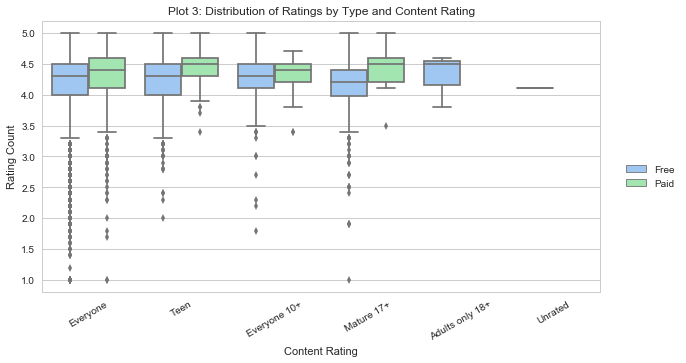

In [6]:
#Comparing groups again, but with a different emphasis.
# Setting the overall aesthetic.
sns.set(style="whitegrid")
plt.figure(figsize=(10,5))

ax = sns.boxplot(x='Content Rating',y='Rating',hue='Type',data=df2,palette='pastel')  
plt.title('Plot 3: Distribution of Ratings by Type and Content Rating')
plt.xticks(rotation=30)
#sns.despine(offset=10, trim=True)
ax.set(xlabel='Content Rating', ylabel='Rating Count')
# Put a legend to the right side
ax.legend(loc='best', bbox_to_anchor=(1.15, .5), ncol=1)

plt.show()

This is the same graph as above but with different emphasis. We categorize with the content rating and then can compare if there are differences within a category between free and paid apps. Paid apps have a trend of being slightly higher in rating compared to free apps. Could this be a reflection of quality that comes with some paid apps as opposed to their free counterparts?

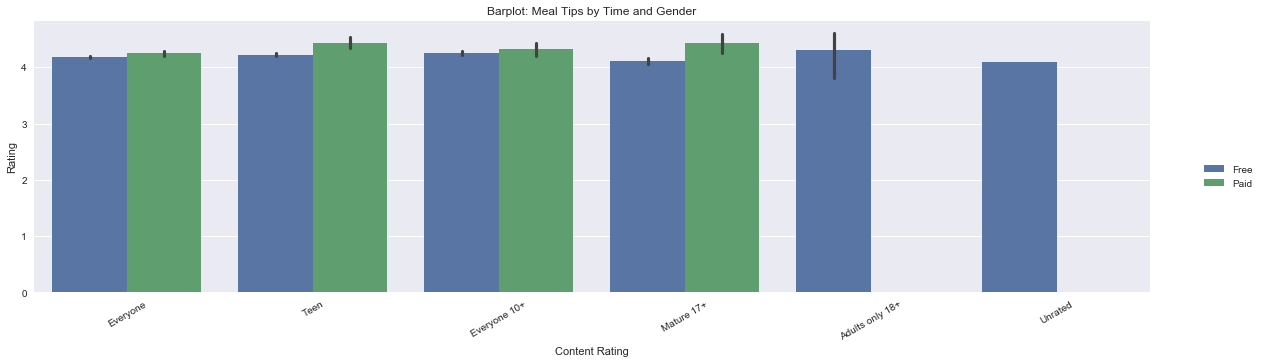

In [7]:
# Setting the overall aesthetic.
sns.set(style="darkgrid")
plt.figure(figsize=(20,5))
g = sns.barplot(x='Content Rating',y='Rating',hue='Type',data=df2)
plt.xticks(rotation=30)
plt.title('Barplot: Meal Tips by Time and Gender')
plt.legend(loc='best', bbox_to_anchor=(1.1, 0.5), ncol=1)

plt.show()

Bar plots lose a lot of resolution that we see with boxplots. Here we just see average and confidence interval and lose resolution of the potential outliers and range of data points.

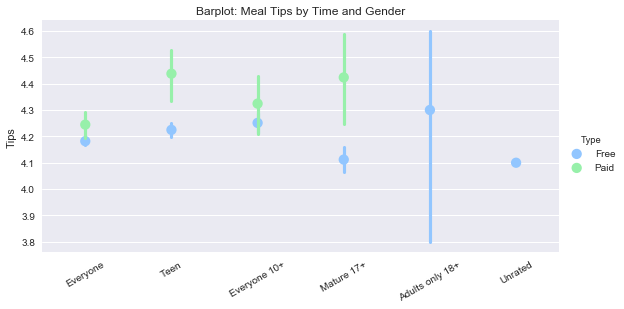

In [8]:
# Setting the overall aesthetic.
sns.set(style="darkgrid")
g = sns.factorplot(x='Content Rating',y='Rating',hue='Type',data=df2,
                   height=6,aspect=2, strip="bar", palette="pastel", ci=95, join=False)

g.despine(left=True)
g.set_ylabels("Tips")
g.set_xlabels("")
plt.title('Barplot: Meal Tips by Time and Gender')
plt.xticks(rotation=30)

plt.show()

This plot is very similar to the box plot but it is more asthetically pleasing and takes less space to show the same information.

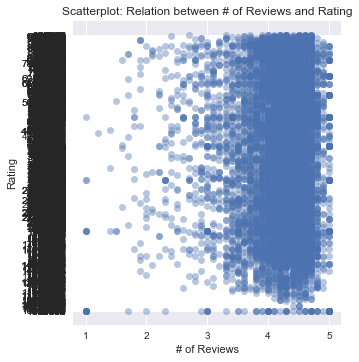

In [9]:
g = sns.lmplot(y='Reviews', # Variable 1.
               x='Rating', # Variable 2.
               data=df2, # Data
               fit_reg=False, # If set to true, plots a regression line.
               scatter_kws={'alpha':0.4}) # Set points to semi-transparent to see overlapping points.
g.set_ylabels("Rating")
g.set_xlabels("# of Reviews")
plt.title('Scatterplot: Relation between # of Reviews and Rating')
plt.show()


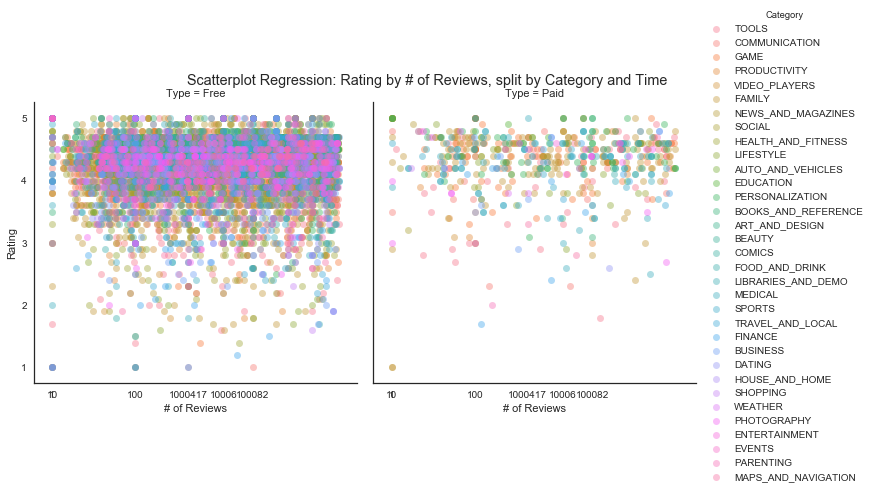

In [12]:
# Setting the overall aesthetic.
sns.set(style="white")

g = sns.lmplot(y='Rating', # Variable 1.
               x='Reviews', # Variable 2.
               hue='Category',
               data=df2, # Data.
               col='Type',
               fit_reg=False,
               ci=False,
               scatter_kws={'alpha':0.4})
g.set(xticks=[0,1,2,3,4,5])
g.set_ylabels("Rating")
g.set_xlabels("# of Reviews")
plt.suptitle('Scatterplot Regression: Rating by # of Reviews, split by Category and Time')
plt.subplots_adjust(top=0.9)
plt.show()

### Find a dataset with at least four continuous variables and one categorical variable. Create one master plot that gives insight into the variables and their interrelationships, including:
- Probability distributions
- Bivariate relationships
- Whether the distributions or the relationships vary across groups
- Accompany your plot with a written description of what you see.

In [9]:
# Loading our sample dataset.
df = pd.read_csv('craigslistVehiclesFull.csv')
# What's inside the file? Let's take a preview.
column_names = list(df.columns.values) 
print(column_names)

['url', 'city', 'price', 'year', 'manufacturer', 'make', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status', 'transmission', 'vin', 'drive', 'size', 'type', 'paint_color', 'image_url', 'lat', 'long', 'county_fips', 'county_name', 'state_fips', 'state_code', 'state_name', 'weather']


In [10]:
df.shape

(1723065, 26)

In [59]:
state_name = ("NY","CT","NJ")

df['state_filter'] = df.state_code.apply(lambda x: x in state_name)
df.head()

,url,city,price,year,manufacturer,make,condition,cylinders,fuel,odometer,...,image_url,lat,long,county_fips,county_name,state_fips,state_code,state_name,weather,state_filter
0,https://marshall.craigslist.org/cto/d/2010-dod...,marshall,11900,2010.0,dodge,challenger se,good,6 cylinders,gas,43600.0,...,https://images.craigslist.org/00i0i_2ggH1eKDNK...,43.4775,-96.7041,46083.0,Lincoln,46.0,SD,South Dakota,38.0,False
1,https://marshall.craigslist.org/cto/d/fleetwoo...,marshall,1515,1999.0,NaN,fleetwood,NaN,NaN,gas,NaN,...,https://images.craigslist.org/00M0M_irjh7SjEcU...,44.7612,-96.6907,46039.0,Deuel,46.0,SD,South Dakota,38.0,False
2,https://marshall.craigslist.org/cto/d/2008-for...,marshall,17550,2008.0,ford,f-150,NaN,NaN,gas,NaN,...,https://images.craigslist.org/00s0s_eL2XFhEUcx...,44.1415,-103.2052,46093.0,Meade,46.0,SD,South Dakota,38.0,False
3,https://marshall.craigslist.org/cto/d/ford-tau...,marshall,2800,2004.0,ford,taurus,good,6 cylinders,gas,168591.0,...,https://images.craigslist.org/00L0L_5HUR1nQjt8...,43.2845,-95.5930,19143.0,Osceola,19.0,IA,Iowa,47.0,False
4,https://marshall.craigslist.org/cto/d/2001-gra...,marshall,400,2001.0,NaN,2001 Grand Prix,NaN,NaN,gas,217000.0,...,https://images.craigslist.org/00n0n_bJJ1XnonSG...,43.0261,-94.4064,19109.0,Kossuth,19.0,IA,Iowa,47.0,False


In [60]:
df3 = df[df.state_filter == True].copy()
df3.head()

,url,city,price,year,manufacturer,make,condition,cylinders,fuel,odometer,...,image_url,lat,long,county_fips,county_name,state_fips,state_code,state_name,weather,state_filter
114,https://hartford.craigslist.org/cto/d/2003-mer...,hartford,3875,2003.0,mercedes,benz ml320,good,6 cylinders,gas,94000.0,...,https://images.craigslist.org/00G0G_iDGgx5NJJV...,41.315400,-72.696800,9009.0,New Haven,9.0,CT,Connecticut,51.0,True
115,https://hartford.craigslist.org/cto/d/2008-vol...,hartford,2099,2008.0,volkswagen,rabbit,good,5 cylinders,gas,120000.0,...,https://images.craigslist.org/00n0n_cTr6VrKvs5...,41.677499,-72.759841,9003.0,Hartford,9.0,CT,Connecticut,51.0,True
121,https://hartford.craigslist.org/cto/d/2001-che...,hartford,6400,2001.0,chevy,2500 van,excellent,8 cylinders,diesel,43757.0,...,https://images.craigslist.org/00707_722x2TfOZf...,41.635293,-72.765416,9003.0,Hartford,9.0,CT,Connecticut,51.0,True
122,https://hartford.craigslist.org/cto/d/infiniti...,hartford,7000,2006.0,infiniti,m35x,good,6 cylinders,gas,157000.0,...,https://images.craigslist.org/01414_1NKbAih5I2...,40.838200,-73.942000,36061.0,New York,36.0,NY,New York,53.0,True
124,https://hartford.craigslist.org/ctd/d/2007-bmw...,hartford,14895,2007.0,bmw,650i,NaN,NaN,gas,50249.0,...,https://images.craigslist.org/00U0U_6WBytQxfAz...,40.876514,-74.072113,34003.0,Bergen,34.0,NJ,New Jersey,52.0,True


In [61]:
df3.shape

(127663, 27)

In [62]:
df4 = df3.dropna().copy()

In [63]:
df4.shape

(12236, 27)

In [29]:
df4.dtypes

url              object
city             object
price             int64
year            float64
manufacturer     object
make             object
condition        object
cylinders        object
fuel             object
odometer        float64
title_status     object
transmission     object
vin              object
drive            object
size             object
type             object
paint_color      object
image_url        object
lat             float64
long            float64
county_fips     float64
county_name      object
state_fips      float64
state_code       object
state_name       object
weather         float64
dtype: object

In [64]:
df5=df4.copy()
df5.year = df5.year.apply(lambda x: int(x))

In [65]:
df5.sort_values(by='price',ascending = False)

,url,city,price,year,manufacturer,make,condition,cylinders,fuel,odometer,...,image_url,lat,long,county_fips,county_name,state_fips,state_code,state_name,weather,state_filter
56313,https://newyork.craigslist.org/lgi/cto/d/1932-...,newyork,9999900,1932,ford,coupe,excellent,8 cylinders,gas,3200.0,...,https://images.craigslist.org/00d0d_6d1lSEzUeJ...,40.714900,-73.556100,36059.0,Nassau,36.0,NY,New York,53.0,True
1458518,https://southjersey.craigslist.org/cto/d/2005-...,southjersey,1234567,2005,mitsubishi,lancer evolution,like new,4 cylinders,gas,78684.0,...,https://images.craigslist.org/00T0T_fdFQaPN8Bg...,39.735400,-74.986400,34007.0,Camden,34.0,NJ,New Jersey,52.0,True
1605865,https://syracuse.craigslist.org/ctd/d/2009-mer...,syracuse,456789,2009,mercury,milan,excellent,6 cylinders,gas,73252.0,...,https://images.craigslist.org/00Y0Y_l3hx0Q3QSX...,43.077522,-76.161473,36067.0,Onondaga,36.0,NY,New York,53.0,True
1604857,https://syracuse.craigslist.org/ctd/d/2009-mer...,syracuse,456789,2009,mercury,milan,excellent,6 cylinders,gas,73252.0,...,https://images.craigslist.org/00Y0Y_l3hx0Q3QSX...,43.077522,-76.161473,36067.0,Onondaga,36.0,NY,New York,53.0,True
1605884,https://syracuse.craigslist.org/ctd/d/2009-che...,syracuse,345678,2009,chevrolet,impala ltz,excellent,6 cylinders,gas,57976.0,...,https://images.craigslist.org/00707_ghzV3m8Mdq...,43.062157,-76.176617,36067.0,Onondaga,36.0,NY,New York,53.0,True
1605314,https://syracuse.craigslist.org/ctd/d/2009-che...,syracuse,345678,2009,chevrolet,impala ltz,excellent,6 cylinders,gas,57976.0,...,https://images.craigslist.org/00707_ghzV3m8Mdq...,43.062157,-76.176617,36067.0,Onondaga,36.0,NY,New York,53.0,True
1610513,https://newyork.craigslist.org/lgi/cto/d/2008-...,newyork,339000,2008,mercedes-benz,benz slr,like new,8 cylinders,gas,4055.0,...,https://images.craigslist.org/00r0r_bYBPZoO64F...,40.729538,-73.680554,36059.0,Nassau,36.0,NY,New York,53.0,True
1609744,https://oneonta.craigslist.org/ctd/d/2018-cadi...,oneonta,84995,2018,cadillac,escalade,good,8 cylinders,gas,1000.0,...,https://images.craigslist.org/00X0X_fylkTTdmFQ...,42.437649,-74.970758,36025.0,Delaware,36.0,NY,New York,53.0,True
1576576,https://oneonta.craigslist.org/ctd/d/2018-cadi...,oneonta,84995,2018,cadillac,escalade,good,8 cylinders,gas,1000.0,...,https://images.craigslist.org/00X0X_fylkTTdmFQ...,42.437649,-74.970758,36025.0,Delaware,36.0,NY,New York,53.0,True
1575804,https://binghamton.craigslist.org/ctd/d/2018-c...,binghamton,84995,2018,cadillac,escalade,good,8 cylinders,gas,1000.0,...,https://images.craigslist.org/00X0X_fylkTTdmFQ...,42.437649,-74.970758,36025.0,Delaware,36.0,NY,New York,53.0,True


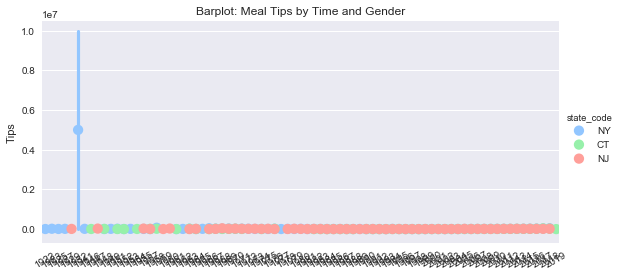

In [67]:
sns.set(style="darkgrid")
g = sns.factorplot(x='year',y='price',hue = 'state_code',data=df5,
                   height=6,aspect=2, strip="bar", palette="pastel", ci=95, join=False)
g.despine(left=True)
g.set_ylabels("Price")
g.set_xlabels("Year")
plt.title('Barplot: Distribution of Price by Year and County')
plt.xticks(rotation=30)

plt.show()

In [68]:
# The graph above shows that 1932 has a large outlier throwing off the whole graph.
# While interesting, we want to look at the rest of the data so let's tentatively drop large values ( >100000)
df6 = df5[df5.price < 100000].copy()
df6.head()

,url,city,price,year,manufacturer,make,condition,cylinders,fuel,odometer,...,image_url,lat,long,county_fips,county_name,state_fips,state_code,state_name,weather,state_filter
489,https://cnj.craigslist.org/cto/d/2012-dodge-55...,cnj,40000,2012,ram,5500,excellent,6 cylinders,diesel,132000.0,...,https://images.craigslist.org/00Y0Y_lNmsHlOS0R...,41.014100,-73.755200,36119.0,Westchester,36.0,NY,New York,53.0,True
802,https://erie.craigslist.org/cto/d/2000-ford-f3...,erie,30000,2000,ford,f350,excellent,8 cylinders,diesel,66505.0,...,https://images.craigslist.org/01010_cqMRTAJ7Mo...,42.097300,-79.329100,36013.0,Chautauqua,36.0,NY,New York,53.0,True
1869,https://providence.craigslist.org/ctd/d/2013-l...,providence,17995,2013,rover,lr4 hse,excellent,8 cylinders,gas,125478.0,...,https://images.craigslist.org/00808_5xNtbaJHeg...,41.909900,-72.602900,9003.0,Hartford,9.0,CT,Connecticut,51.0,True
2095,https://buffalo.craigslist.org/ctd/d/2012-niss...,buffalo,7499,2012,nissan,sentra 2.0,good,4 cylinders,gas,90032.0,...,https://images.craigslist.org/00606_hqW9fnpj7V...,42.989700,-78.873330,36029.0,Erie,36.0,NY,New York,53.0,True
2104,https://buffalo.craigslist.org/cto/d/63-nova-i...,buffalo,25000,1963,chevrolet,nova,excellent,6 cylinders,gas,52566.0,...,https://images.craigslist.org/00L0L_5zwW4s0F7A...,42.771437,-78.865495,36029.0,Erie,36.0,NY,New York,53.0,True


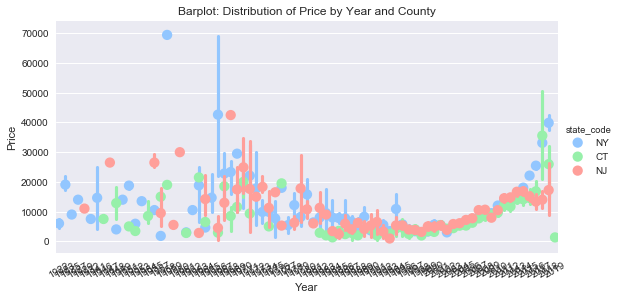

In [69]:
sns.set(style="darkgrid")
g = sns.factorplot(x='year',y='price',hue = 'state_code',data=df6, #note using new df6
                   height=6,aspect=2, strip="bar", palette="pastel", ci=95, join=False)
g.despine(left=True)
g.set_ylabels("Price")
g.set_xlabels("Year")
plt.title('Barplot: Distribution of Price by Year and County')
plt.xticks(rotation=30)

plt.show()

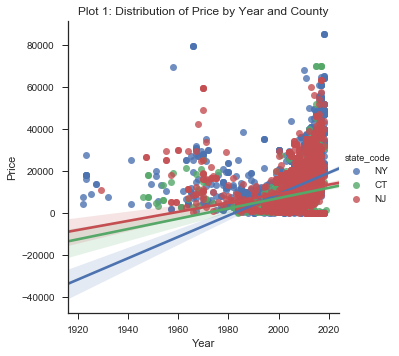

In [70]:
# Showing the  information in a seaborn facet grid.
sns.set(style="ticks")  #Setting the overall aesthetic

# Comparing groups using boxplots.
ax = sns.lmplot(x='year',y='price',hue = 'state_code', data=df6)  
plt.title('Plot 1: Distribution of Price by Year and County')
sns.despine(offset=0, trim=False)
ax.set(xlabel='Year', ylabel='Price')
# Put a legend to the right side
#ax.legend(loc='center right', bbox_to_anchor=(1.5, 0.5), ncol=1)

plt.show()

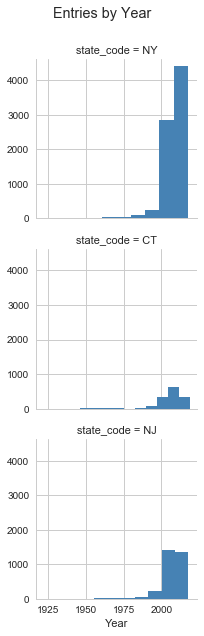

In [72]:
# Showing the  information in a seaborn facet grid.
sns.set(style="whitegrid")  #Setting the overall aesthetic

# Tell seaborn about the structure of our data.
g = sns.FacetGrid(df6, row="state_code", legend_out=True)
# Name the plot type and the variable to be plotted using the structure.
g.map(plt.hist, "year", color="steelblue",  lw=0)
# Moving the plots apart to make room for our titles.
plt.subplots_adjust(top=.90)
# Making a more informative axis name.
g.set_axis_labels('Year')
#g.set(xticks=[0,1,2,3,4,5])
plt.suptitle('Entries by Year')
# Removing excess lines around the plot.
sns.despine(trim=False)
plt.show()


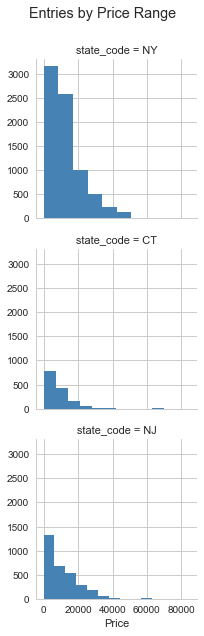

In [74]:
# Showing the  information in a seaborn facet grid.
sns.set(style="whitegrid")  #Setting the overall aesthetic

# Tell seaborn about the structure of our data.
g = sns.FacetGrid(df6, row="state_code", legend_out=True)
# Name the plot type and the variable to be plotted using the structure.
g.map(plt.hist, "price", color="steelblue",  lw=0)
# Moving the plots apart to make room for our titles.
plt.subplots_adjust(top=.90)
# Making a more informative axis name.
g.set_axis_labels('Price')
#g.set(xticks=[0,1,2,3,4,5])
plt.suptitle('Entries by Price Range')
# Removing excess lines around the plot.
sns.despine(trim=False)
plt.show()


## Observations:

Most of our entries come from NY and most of the prices of cars listed in our very small subset of the craigslist data are priced below 20k. There are more cars priced in the higher ranges for the state of NY.Linear regression on our data shows that NY has higher prices for newer cars compared to CT and NJ but older cars are priced higher in those states compared to NY.